In [14]:
import numpy as np
import pandas as pd
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Load the dataset
file_path = 'Amazon Sales data.csv'
df = pd.read_csv(file_path, encoding='ascii')
df.shape

(100, 14)

In [6]:
head = df.head()
head

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [7]:
tail = df.tail()
tail

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [8]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [9]:
# Convert 'Order Date' and 'Ship Date' to datetime
for column in ['Order Date', 'Ship Date']:
    df[column] = pd.to_datetime(df[column], format='%m/%d/%Y')

# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Create a combined year-month column for yearly_month-wise analysis
df['Year_Month'] = df['Order Date'].dt.to_period('M')

# Display the head of the dataframe to confirm the changes
head = df.head()
head

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Year_Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


In [11]:
# Analyze sales trends month-wise, year-wise, and yearly_month-wise

# Month-wise sales trend
month_wise_sales = df.groupby('Month')['Total Revenue'].sum().sort_index()

# Year-wise sales trend
year_wise_sales = df.groupby('Year')['Total Revenue'].sum().sort_index()

# Yearly_month-wise sales trend
yearly_month_wise_sales = df.groupby('Year_Month')['Total Revenue'].sum().sort_index()

# Display the results
month_wise_sales, year_wise_sales, yearly_month_wise_sales

(Month
 1     10482467.12
 2     24740517.77
 3      2274823.87
 4     16187186.33
 5     13215739.99
 6      5230325.77
 7     15669518.50
 8      1128164.91
 9      5314762.56
 10    15287576.61
 11    20568222.76
 12     7249462.12
 Name: Total Revenue, dtype: float64,
 Year
 2010    19186024.92
 2011    11129166.07
 2012    31898644.52
 2013    20330448.66
 2014    16630214.43
 2015    12427982.86
 2016    12372867.22
 2017    13373419.63
 Name: Total Revenue, dtype: float64,
 Year_Month
 2010-02    3410661.12
 2010-05    2587973.26
 2010-06    1082418.40
 2010-10    6064933.75
 2010-11    3458252.00
 2010-12    2581786.39
 2011-01    1042225.35
 2011-02     387002.20
 2011-04    2798046.49
 2011-05     272410.45
 2011-06      19103.44
 2011-07      97040.64
 2011-09     574951.92
 2011-11    5938385.58
 2012-01    1012884.00
 2012-02    6707849.42
 2012-03     994765.42
 2012-04    4556012.38
 2012-05    3782781.82
 2012-06    2132075.27
 2012-07    4445093.92
 2012-08     576782.

/tmp/ipykernel_95/1625890167.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


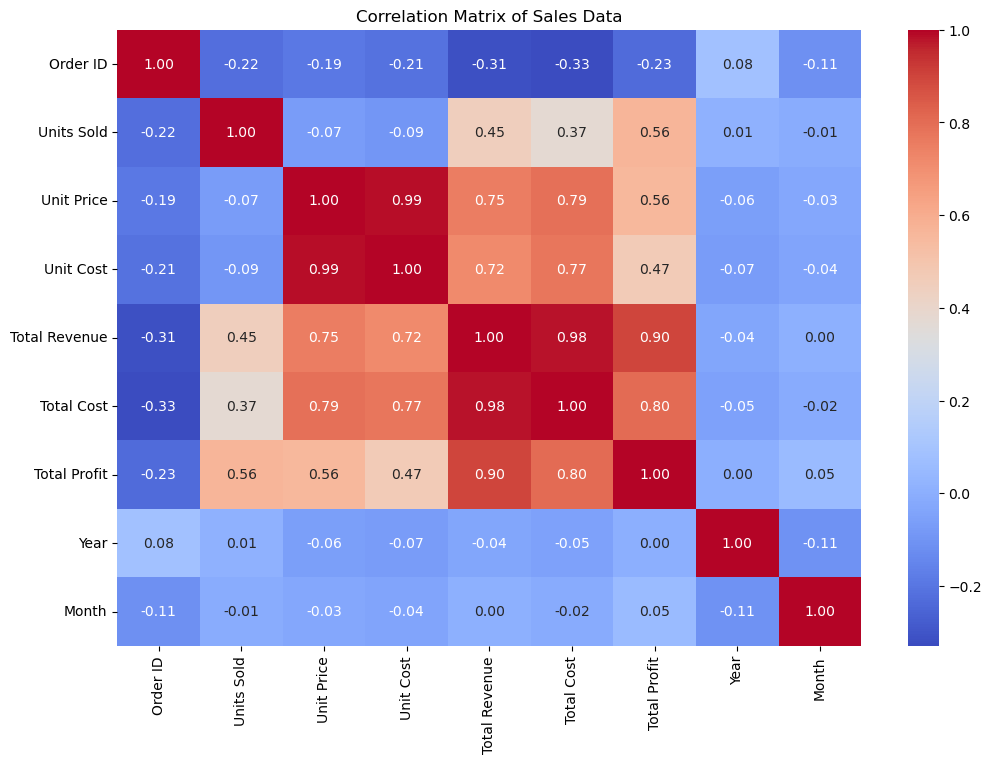

               Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  \
Order ID       1.000000   -0.222907   -0.190941  -0.213201      -0.314688   
Units Sold    -0.222907    1.000000   -0.070486  -0.092232       0.447784   
Unit Price    -0.190941   -0.070486    1.000000   0.987270       0.752360   
Unit Cost     -0.213201   -0.092232    0.987270   1.000000       0.715623   
Total Revenue -0.314688    0.447784    0.752360   0.715623       1.000000   
Total Cost    -0.328944    0.374746    0.787905   0.774895       0.983928   
Total Profit  -0.234638    0.564550    0.557365   0.467214       0.897327   
Year           0.081752    0.012455   -0.061791  -0.071567      -0.037128   
Month         -0.111219   -0.007995   -0.031917  -0.042016       0.003835   

               Total Cost  Total Profit      Year     Month  
Order ID        -0.328944     -0.234638  0.081752 -0.111219  
Units Sold       0.374746      0.564550  0.012455 -0.007995  
Unit Price       0.787905      0.557365 -0.

In [12]:
# Calculate the correlation matrix to find relationships between numeric attributes
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Sales Data')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

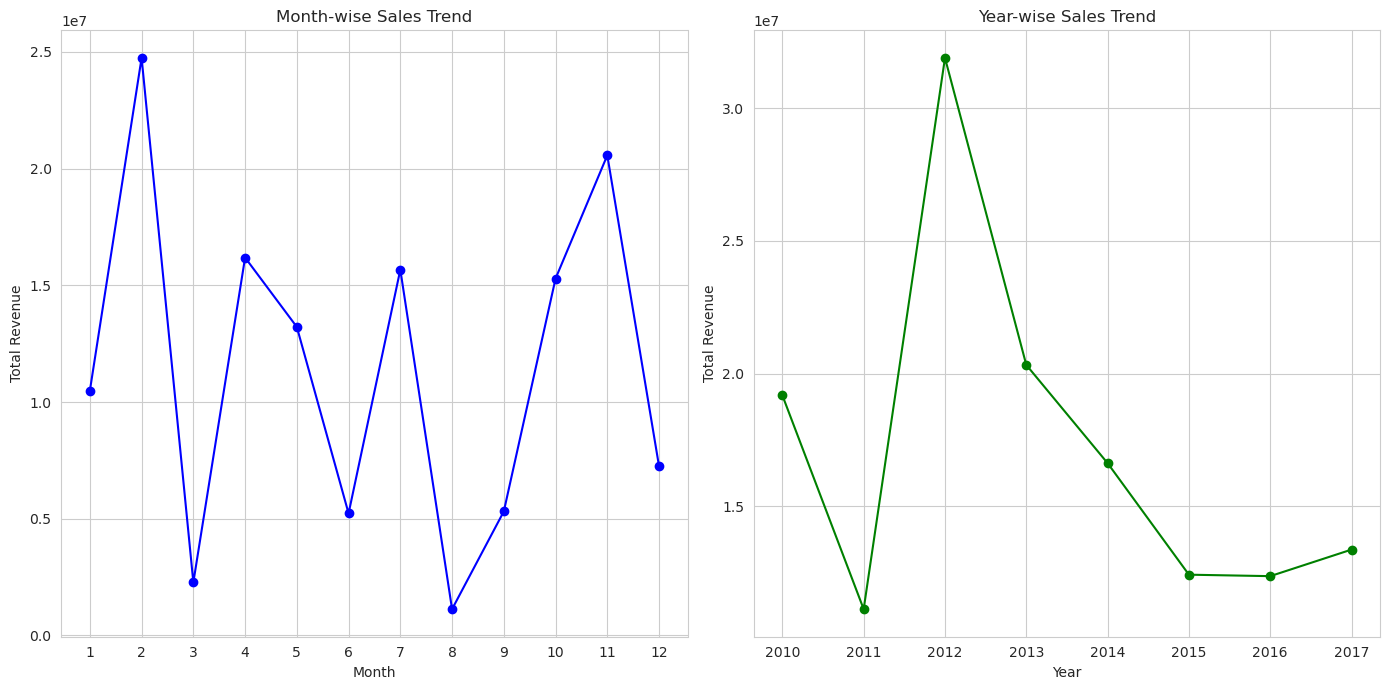

In [13]:

# Set the style for seaborn
sns.set_style('whitegrid')

# Create line charts for month-wise and year-wise sales trends
plt.figure(figsize=(14, 7))

# Month-wise sales trend
plt.subplot(1, 2, 1)
month_wise_sales.plot(kind='line', marker='o', color='blue')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))  # Set x-ticks to be the months

# Year-wise sales trend
plt.subplot(1, 2, 2)
year_wise_sales.plot(kind='line', marker='o', color='green')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(year_wise_sales.index)  # Set x-ticks to be the years

# Show the plots
plt.tight_layout()
plt.show()